# Simulation of HPL on Dahu

In [1]:
import io
import zipfile
import pandas
from plotnine import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # removing annoying Pandas warning

def read_result(name):
    archive = zipfile.ZipFile(name)
    return pandas.read_csv(io.BytesIO(archive.read('results.csv')))

simulation_file = 'grenoble_2018-10-02_1810925.zip'
dfsim = read_result(simulation_file)
dfsim['mode'] = 'simulation_new'
dfsim_old = read_result('grenoble_2018-09-24_1809767.zip')
dfsim_old['mode'] = 'simulation_old'
dfexec = read_result('../hpl/grenoble_2018-10-02_1810918.zip')
dfexec['mode'] = 'execution_new'
dfexec_old = read_result('../hpl/grenoble_2018-09-12_1809240.zip')
dfexec_old['mode'] = 'execution_old'
df = pandas.concat([dfsim, dfsim_old, dfexec, dfexec_old])
sizes = set(dfsim.matrix_size) & set(dfexec.matrix_size)
df = df[df.matrix_size.isin(sizes)]
df.head()

/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tom/.local/share/virtualenvs/mpi_calibration-tfxxshdH/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,application_time,bcast,block_size,cpu_utilization,depth,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept,gflops,...,proc_q,process_per_node,residual,rfact,simulation_time,swap,sys_time,thread_per_process,time,usr_time
0,17.73430,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,7122.0,...,32,32,NaN,2,164.5910,0,13.99,1,1.39,150.18
2,95.81920,2,128,0.96,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,13700.0,...,32,32,NaN,2,902.7810,0,71.83,1,109.57,796.84
3,5.28326,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,1548.0,...,32,32,NaN,2,48.5613,0,3.94,1,0.24,44.58
4,49.51540,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,12010.0,...,32,32,NaN,2,453.5920,0,39.18,1,15.63,413.37
5,2.41477,2,128,0.99,1,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07,422.9,...,32,32,NaN,2,23.0375,0,1.91,1,0.11,21.14


### Checking the parameters

In [2]:
dfsim[['dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept']].drop_duplicates()

,dgemm_coefficient,dgemm_intercept,dtrsm_coefficient,dtrsm_intercept
0,6.576115e-11,1.000000e-07,3.441913e-11,1.000000e-07


In [3]:
name_exceptions = {'application_time', 'simulation_time', 'usr_time', 'sys_time', 'time', 'gflops', 'residual', 'cpu_utilization',
                   'dgemm_coefficient', 'dgemm_intercept', 'dtrsm_coefficient', 'dtrsm_intercept',
                   'major_page_fault', 'minor_page_fault', 'matrix_size', 'mode'}
colnames = set(df) - name_exceptions
df[list(colnames)].drop_duplicates()

,bcast,rfact,thread_per_process,proc_q,pfact,swap,proc_p,process_per_node,block_size,depth,mem_align
0,2,2,1,32,1,0,16,32,128,1,8


In [4]:
print(zipfile.ZipFile(simulation_file).read('dahu.xml').decode('ascii'))

<?xml version="1.0"?>
<!DOCTYPE platform SYSTEM "http://simgrid.gforge.inria.fr/simgrid/simgrid.dtd">

<platform version="4.1">
    <config id="General">
        <prop id="smpi/os" value="0:2.9654918472829634e-07:9.636195922971908e-11;8133:0.0:0.0;15831:0.0:0.0;33956:0.0:0.0;63305:0.0:0.0"/>
        <prop id="smpi/or" value="0:1.3754300044375224e-06:8.456019002037343e-11;8133:0.0:0.0;15831:0.0:0.0;33956:0.0:0.0;63305:0.0:0.0"/>
        <prop id="smpi/ois" value="0:6.93122952108322e-07:7.051204536228499e-11;8133:3.601990790153314e-07:1.2449128895712003e-10;15831:2.977016881030904e-06:4.130261264964205e-11;33956:3.1334661540668004e-06:3.293458765282178e-11;63305:6.939993663604218e-07:0.0"/>
        <prop id="smpi/bw-factor" value="0:0.4709912642540426;8133:0.6770561715947873;15831:0.7091971477925826;33956:0.7033449540683548;63305:0.9867951082730284"/>
        <prop id="smpi/lat-factor" value="0:1.1347371681807956;8133:29.84698135078078;15831:30.274775156187765;33956:64.63917831305292;633

### Comparing the simulation with the real execution

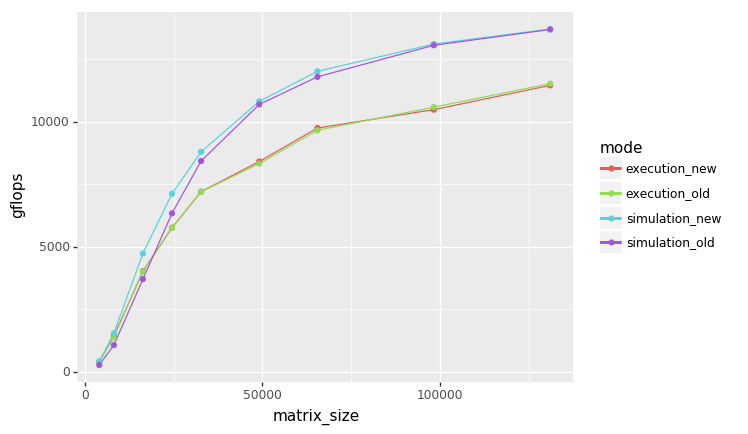

<ggplot: (-9223363253623626152)>

In [5]:
ggplot(df, aes(x='matrix_size', y='gflops', color='mode')) + geom_line() + geom_point()

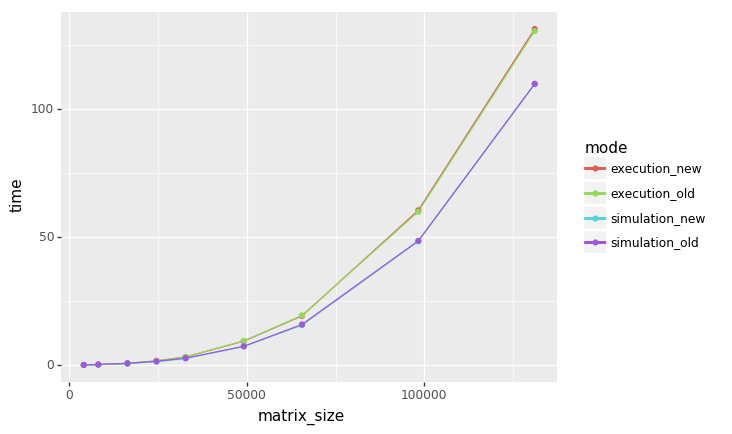

<ggplot: (-9223363253623642536)>

In [6]:
ggplot(df, aes(x='matrix_size', y='time', color='mode')) + geom_line() + geom_point()

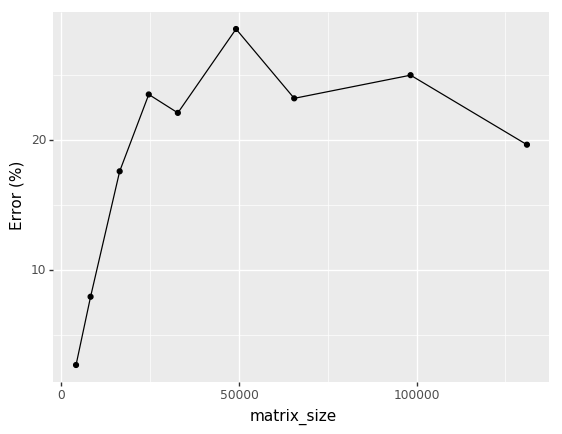

<ggplot: (8783231149646)>

In [7]:
tmp = dfsim.set_index('matrix_size').join(dfexec.set_index('matrix_size'), rsuffix='_real').reset_index()
tmp['error'] = (tmp.gflops - tmp.gflops_real) / tmp.gflops_real * 100
tmp = tmp[~tmp.error.isna()]
ggplot(tmp, aes(x='matrix_size', y='error')) + geom_line() + geom_point() + ylab('Error (%)')

### Efficiency of the simulation

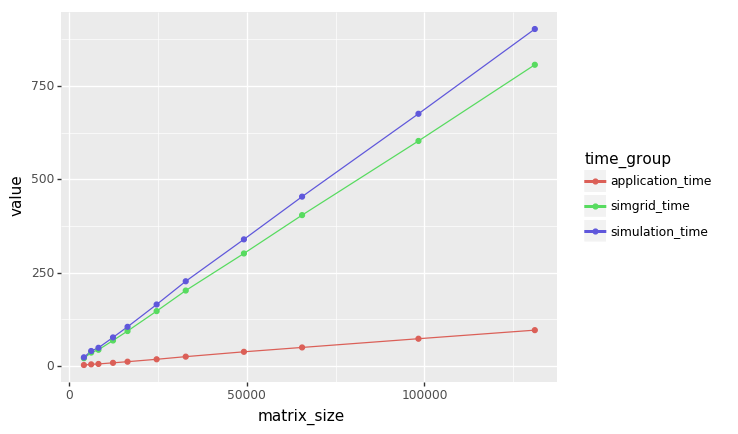

<ggplot: (8783228951437)>


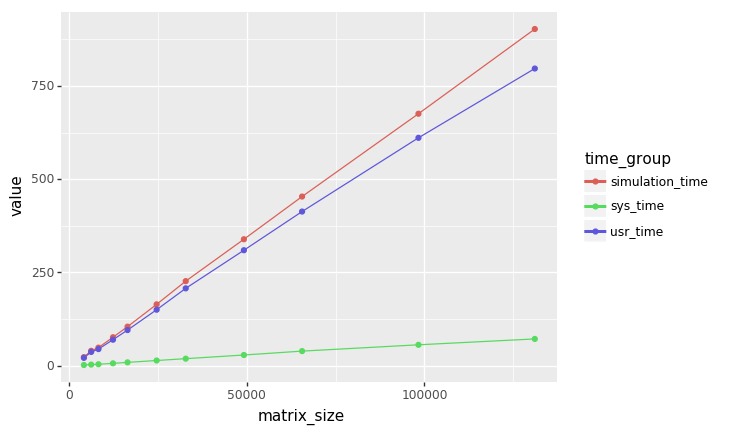

<ggplot: (-9223363253625863985)>

In [8]:
dfsim['simgrid_time'] = dfsim.simulation_time - dfsim.application_time

print(ggplot(dfsim.melt(id_vars=['matrix_size'], value_vars=['simulation_time', 'application_time', 'simgrid_time'], var_name='time_group'),
       aes(x='matrix_size', y='value', color='time_group')) + geom_line() + geom_point())

ggplot(dfsim.melt(id_vars=['matrix_size'], value_vars=['simulation_time', 'usr_time', 'sys_time'], var_name='time_group'),
       aes(x='matrix_size', y='value', color='time_group')) + geom_line() + geom_point()